### Load packages

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pic_path = 'C:/Users/Shelter6/Desktop/test.jpg'

In [4]:
test_img = cv2.imread(pic_path)
test_c = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

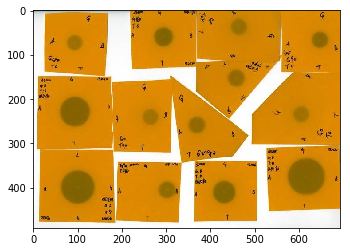

In [5]:
plt.imshow(test_c)
plt.show()

In [6]:
test_img = cv2.imread(pic_path)
test_g = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)

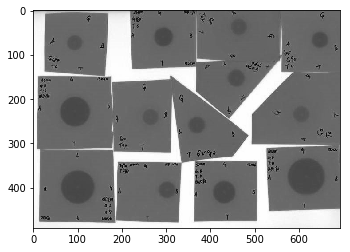

In [7]:
plt.imshow(test_g,cmap="gray")
plt.show()

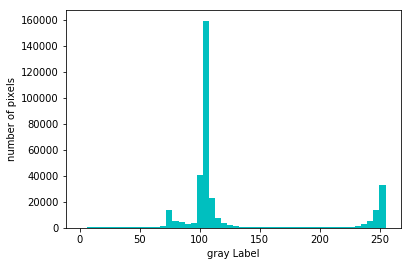

In [8]:
plt.hist(test_g.flatten(), bins=50, color='c')
plt.xlabel("gray Label")
plt.ylabel("number of pixels")
plt.show()

### To find the circles

In [9]:
## We need to adjust param1,param2,minRadius,maxRadius 
## to find the accurate number of circles
circles = cv2.HoughCircles(test_g,cv2.HOUGH_GRADIENT,1,100,
                            param1=15,param2=30,minRadius=5,maxRadius=45)

In [10]:
print('There are {} circles'.format(circles.shape[1]))

There are 13 circles


In [21]:
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(test_c,(i[0],i[1]),i[2],(0,255,0),1)
    print('circles: iso=({},{}) and radius={}'.format(i[0],i[1],i[2]))
    # draw the center of the circle
    cv2.circle(test_c,(i[0],i[1]),2,(0,0,255),3)

circles: iso=(94,228) and radius=33
circles: iso=(614,374) and radius=42
circles: iso=(430,410) and radius=25
circles: iso=(100,396) and radius=40
circles: iso=(294,60) and radius=21
circles: iso=(458,154) and radius=18
circles: iso=(302,404) and radius=19
circles: iso=(464,38) and radius=18
circles: iso=(646,66) and radius=19
circles: iso=(94,74) and radius=17
circles: iso=(264,242) and radius=19
circles: iso=(368,258) and radius=18
circles: iso=(604,234) and radius=17


In [22]:
cv2.imshow('detected circles',test_c)
cv2.imwrite('C:/Users/Shelter6/Desktop/test_circle1.jpg',test_c)

True

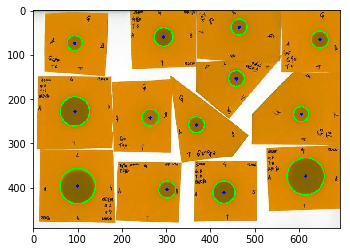

In [23]:
plt.imshow(test_c)
plt.show()

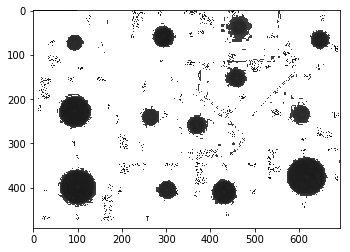

In [14]:
test_c = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
test_c[test_c>100] = 255
test_c[test_c<50] = 255
plt.imshow(test_c,cmap="gray")
plt.show()

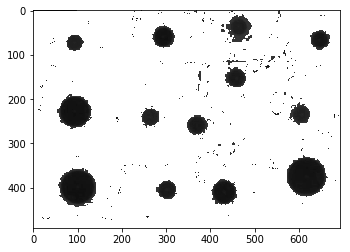

In [15]:
## median filter
test_new = cv2.medianBlur(test_c, 3)
plt.imshow(test_new,cmap="gray")
plt.show()

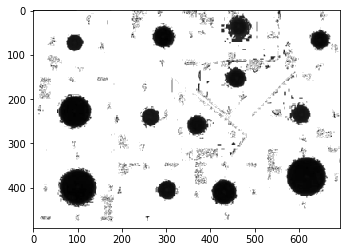

In [16]:
## mean filter
kernel = np.ones((3,3),np.float32)/9
processed_image = cv2.filter2D(test_c,-1,kernel)
plt.imshow(processed_image,cmap="gray")
plt.show()

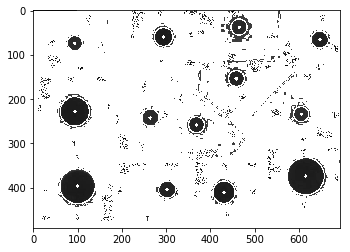

In [37]:
plt.imshow(test_g,cmap="gray")
plt.show()

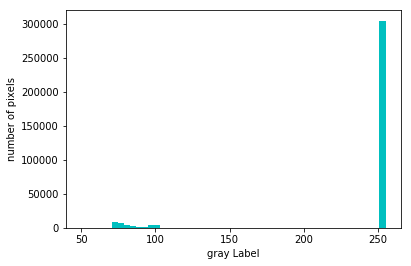

In [34]:
plt.hist(test_g.flatten(), bins=50, color='c')
plt.xlabel("gray Label")
plt.ylabel("number of pixels")
plt.show()

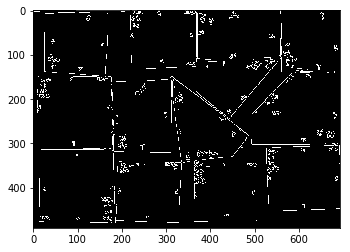

In [36]:
## edge detection
test_c = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(test_c,0,100)
plt.imshow(edges,cmap='gray')
plt.show()

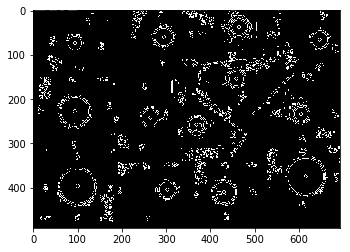

In [29]:
edges = cv2.Canny(test_g,0,100)
plt.imshow(edges,cmap='gray')
plt.show()

### Load packages

In [36]:
import os
import cv2
import pydicom
import numpy as np
import matplotlib.pyplot as plt

In [9]:
path = 'C:/Users/Shelter6/Desktop/BB/BB'

In [11]:
file_list = os.listdir(path)
file_list

['RTIMAGE1.3.46.423632.131000.1542250432.15.dcm',
 'RTIMAGE1.3.46.423632.131000.1542250581.16.dcm',
 'RTIMAGE1.3.46.423632.131000.1542250646.17.dcm',
 'RTIMAGE1.3.46.423632.131000.1542250719.18.dcm',
 'RTIMAGE1.3.46.423632.131000.1542250823.23.dcm',
 'RTIMAGE1.3.46.423632.131000.1542250891.24.dcm',
 'RTIMAGE1.3.46.423632.131000.1542250993.25.dcm',
 'RTIMAGE1.3.46.423632.131000.1542251081.26.dcm']

In [75]:
BB_file = []
for item in file_list:
    img = pydicom.read_file(os.path.join(path,item),force = True)
    BB_file.append(img)
len(BB_file)

8

In [213]:
BB_file[0].pixel_array
BB_img = np.stack([s.pixel_array for s in BB_file])
BB_img.shape

(8, 1024, 1024)

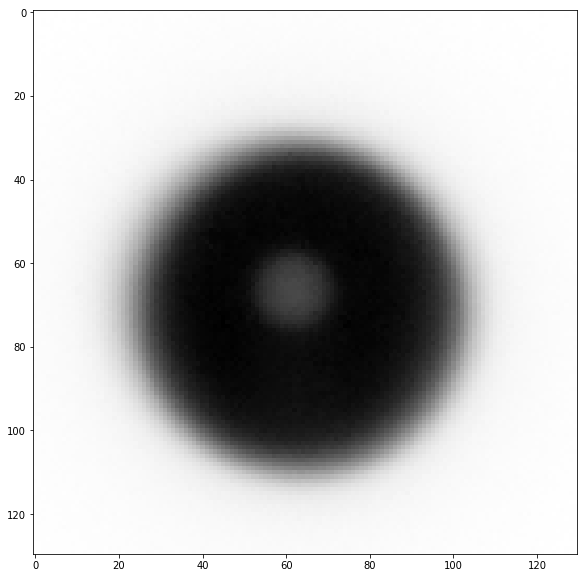

In [221]:
TEST = BB_img[0,450:580,450:580]
plt.figure(figsize=(10,10))
plt.imshow(TEST,cmap = 'gray')
plt.show()

In [215]:
TEST = TEST.astype('uint8') ## To make sure the pic is 8 bit to avoid the error in circles
circles = cv2.HoughCircles(TEST,cv2.HOUGH_GRADIENT,1,5,param1=100,param2=42,minRadius=5,maxRadius=40)
circles.shape

(1, 6, 3)

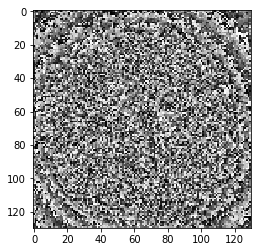

In [220]:
plt.imshow(TEST,cmap = 'gray')
plt.show()

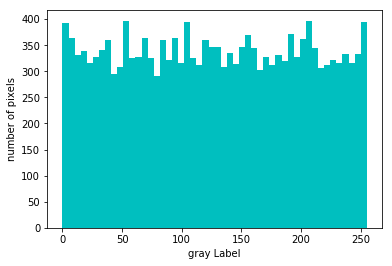

In [216]:
plt.hist(TEST.flatten(), bins=50, color='c')
plt.xlabel("gray Label")
plt.ylabel("number of pixels")
plt.show()

In [217]:
min_,max_ = np.min(TEST),np.max(TEST)

In [218]:
TEST = (TEST-min_)/(max_-min_)*255
TEST = TEST.astype('uint8') ## To make sure the pic is 8 bit to avoid the error in circles

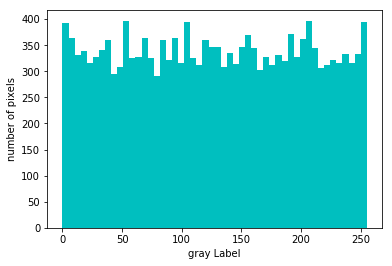

In [219]:
plt.hist(TEST.flatten(), bins=50, color='c')
plt.xlabel("gray Label")
plt.ylabel("number of pixels")
plt.show()

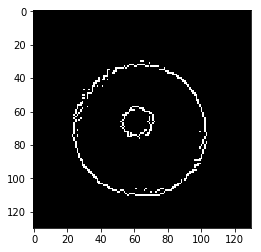

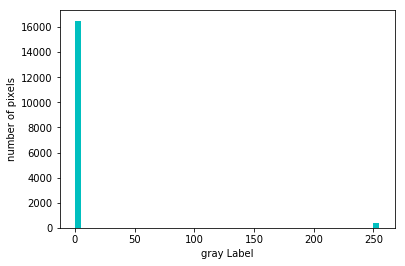

In [185]:
edges = cv2.Canny(TEST,40,120)
plt.imshow(edges,cmap = 'gray')
plt.show()
edges = edges.astype('uint8')
plt.hist(edges.flatten(), bins=50, color='c')
plt.xlabel("gray Label")
plt.ylabel("number of pixels")
plt.show()

In [200]:
circles = cv2.HoughCircles(TEST,cv2.HOUGH_GRADIENT,1,15,param1=50,param2=30,minRadius=0,maxRadius=45)
circles.shape

(1, 1, 3)

In [201]:
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(TEST,(i[0],i[1]),i[2],(0,255,0),1)
    print('circles: iso=({},{}) and radius={}'.format(i[0],i[1],i[2]))
    # draw the center of the circle
    #cv2.circle(TEST,(i[0],i[1]),2,(0,0,255),3)

circles: iso=(62,70) and radius=34


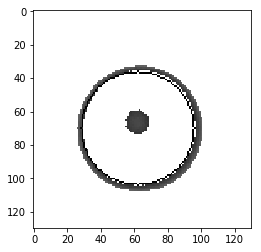

In [202]:
plt.imshow(TEST,cmap = 'gray')
plt.show()

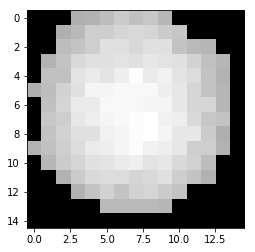

In [195]:
plt.imshow(TEST[60:75,55:70],cmap = 'gray')
plt.show()

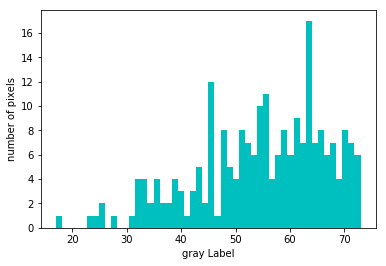

In [163]:
plt.hist(TEST[60:75,55:70].flatten(), bins=50, color='c')
plt.xlabel("gray Label")
plt.ylabel("number of pixels")
plt.show()

In [145]:
TEST2 = TEST[55:80,50:75]
circles = cv2.HoughCircles(TEST2,cv2.HOUGH_GRADIENT,1,5,param1=10,param2=30,minRadius=5,maxRadius=40)
circles.shape

(1, 1, 3)

In [146]:
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(TEST2,(i[0],i[1]),i[2],(0,255,0),1)
    print('circles: iso=({},{}) and radius={}'.format(i[0],i[1],i[2]))
    # draw the center of the circle
    #cv2.circle(TEST,(i[0],i[1]),2,(0,0,255),3)

circles: iso=(0,0) and radius=0
